In [1]:
import torch
from torch.nn import Linear
from torch import nn

In [2]:
# 获得训练数据
import numpy as np
import random
x = sorted([random.randint(-1000, 1000) * 0.01 for i in range(10)])
y = sorted([random.randint(-1000, 1000) * 0.01 for i in range(10)])
x_train = [[i] for i in x]
y_train = [[i] for i in y]
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train, '\n', y_train)

[[-8.77]
 [-7.71]
 [-5.28]
 [-1.84]
 [-1.74]
 [-1.11]
 [ 1.39]
 [ 2.  ]
 [ 7.1 ]
 [ 9.58]] 
 [[-9.39]
 [-4.7 ]
 [-4.03]
 [-3.71]
 [-3.53]
 [ 0.08]
 [ 0.77]
 [ 3.51]
 [ 3.92]
 [ 6.76]]


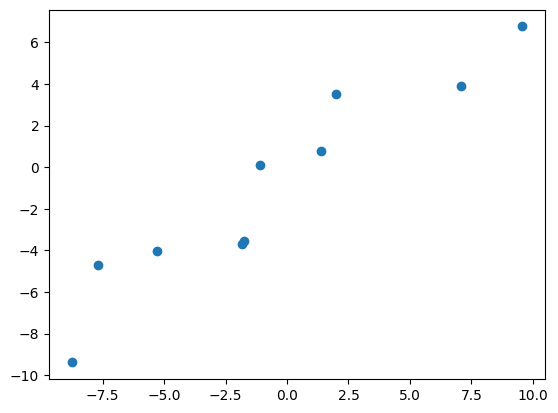

In [3]:
# 画图
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()

In [4]:
# 将numpy变量转化为tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()
print(x_train, '\n', y_train)

tensor([[-8.7700],
        [-7.7100],
        [-5.2800],
        [-1.8400],
        [-1.7400],
        [-1.1100],
        [ 1.3900],
        [ 2.0000],
        [ 7.1000],
        [ 9.5800]]) 
 tensor([[-9.3900],
        [-4.7000],
        [-4.0300],
        [-3.7100],
        [-3.5300],
        [ 0.0800],
        [ 0.7700],
        [ 3.5100],
        [ 3.9200],
        [ 6.7600]])


In [5]:
# 定义模型， 应当包含 __init__（）函数和forward()函数
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = Linear(1, 1)
    
    def forward(self, x) :
        out = self.linear(x)
        return out
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else :
    model = LinearRegression()

In [6]:
# 定义损失函数和优化函数
criterison = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [7]:
# 开始训练模型
from torch.autograd import Variable
# 定义要跑的批(epoch)数
num_epochs = 1000
for epoch in range(num_epochs) :
    # 获得每一批数据的输出
    if torch.cuda.is_available() :
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else :
        inputs = Variable(x_train)
        target = Variable(y_train)
    # forward前向计算
    out = model(inputs)
    loss = criterison(out, target)
    # backward 计算误差项及更新参数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 一轮训练结束， 输出信息
    if(epoch + 1) % 20 == 0 :
        print('Epoch[{}/{}], loss : {:.6f}'.format(epoch + 1, num_epochs, loss.data[0]))

IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

In [ ]:
# 将模型变成测试模式
model.eval()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1)
)

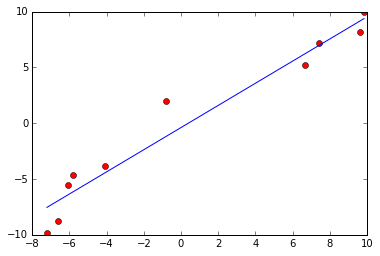

In [ ]:
# 测试结果与真实结果作比较
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')